## Climate Analysis using SQLAlchemy - Climate Analysis

In [1]:
# Dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy import create_engine, MetaData
from sqlalchemy.ext.declarative import declarative_base
from sqlalchemy import create_engine, inspect, func

In [2]:
# Create an engine to a SQLite database file called `surfsup.sqlite`
engine = create_engine("sqlite:///hawaii.sqlite")

### Inspect Database

In [3]:
from sqlalchemy.orm import Session
# Connect to database to be able to run test queries
session = Session(bind=engine)

In [4]:
inspector = inspect(engine)
inspector.get_table_names()

['measurement', 'station']

In [5]:
# Get a list of column names and types
columns = inspector.get_columns('measurement')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station VARCHAR(12)
date TEXT
prcp FLOAT
tobs FLOAT


In [6]:
engine.execute('SELECT * FROM measurement LIMIT 5').fetchall()

[(0, 'USC00519397', '2010-01-01', 0.08, 65.0),
 (1, 'USC00519397', '2010-01-02', 0.0, 63.0),
 (2, 'USC00519397', '2010-01-03', 0.0, 74.0),
 (3, 'USC00519397', '2010-01-04', 0.0, 76.0),
 (4, 'USC00519397', '2010-01-06', 0.0, 73.0)]

In [7]:
engine.execute("SELECT * FROM measurement WHERE date = '2016-09-14'").fetchall()

[(2385, 'USC00519397', '2016-09-14', 1.32, 75.0),
 (5112, 'USC00513117', '2016-09-14', 0.9, 76.0),
 (7347, 'USC00514830', '2016-09-14', 1.84, 79.0),
 (8837, 'USC00517948', '2016-09-14', 0.0, 76.0),
 (11871, 'USC00519523', '2016-09-14', 1.19, 77.0),
 (14629, 'USC00519281', '2016-09-14', 2.33, 75.0),
 (19222, 'USC00516128', '2016-09-14', 6.7, 73.0)]

### Climate Analysis & Exploration

In [8]:
from sqlalchemy.ext.automap import automap_base

# Reflect Database into ORM class
Base = automap_base()
Base.prepare(engine, reflect=True)
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Query all tobs values
results = session.query(Measurement.tobs).all()

# Convert list of tuples into normal list
tobs_values = list(np.ravel(results))
tobs_values

[65.0,
 63.0,
 74.0,
 76.0,
 73.0,
 70.0,
 64.0,
 68.0,
 73.0,
 64.0,
 61.0,
 66.0,
 65.0,
 68.0,
 64.0,
 72.0,
 66.0,
 66.0,
 69.0,
 67.0,
 67.0,
 71.0,
 67.0,
 76.0,
 68.0,
 72.0,
 70.0,
 67.0,
 66.0,
 67.0,
 69.0,
 67.0,
 67.0,
 64.0,
 69.0,
 73.0,
 73.0,
 69.0,
 69.0,
 69.0,
 71.0,
 61.0,
 69.0,
 63.0,
 64.0,
 65.0,
 67.0,
 68.0,
 65.0,
 76.0,
 75.0,
 66.0,
 70.0,
 72.0,
 73.0,
 70.0,
 71.0,
 72.0,
 72.0,
 69.0,
 70.0,
 73.0,
 72.0,
 73.0,
 70.0,
 71.0,
 68.0,
 70.0,
 72.0,
 69.0,
 68.0,
 74.0,
 72.0,
 72.0,
 73.0,
 74.0,
 73.0,
 73.0,
 74.0,
 74.0,
 74.0,
 71.0,
 72.0,
 75.0,
 75.0,
 75.0,
 75.0,
 73.0,
 73.0,
 71.0,
 71.0,
 68.0,
 70.0,
 71.0,
 74.0,
 71.0,
 75.0,
 76.0,
 75.0,
 75.0,
 76.0,
 76.0,
 76.0,
 77.0,
 77.0,
 73.0,
 74.0,
 76.0,
 76.0,
 80.0,
 74.0,
 77.0,
 77.0,
 76.0,
 77.0,
 78.0,
 78.0,
 75.0,
 73.0,
 77.0,
 76.0,
 77.0,
 77.0,
 78.0,
 75.0,
 77.0,
 77.0,
 77.0,
 76.0,
 75.0,
 77.0,
 77.0,
 77.0,
 78.0,
 76.0,
 78.0,
 76.0,
 77.0,
 78.0,
 77.0,
 78.0,
 78.0,
 79.0,

In [10]:
# Query for last 12 months of precipitation
last_12_months_precipitation = session.query(Measurement.date, Measurement.prcp).\
        filter(Measurement.date >= '2016-08-24').filter(Measurement.date <= '2017-08-23').order_by(Measurement.date).all()

In [11]:
# Set above query results to dataframe
df_last12months_precipitation = pd.DataFrame(data=last_12_months_precipitation)
df_last12months_precipitation.head(40)

,date,prcp
0,2016-08-24,0.08
1,2016-08-24,2.15
2,2016-08-24,2.28
3,2016-08-24,0.00
4,2016-08-24,1.22
5,2016-08-24,2.15
6,2016-08-24,1.45
7,2016-08-25,0.08
8,2016-08-25,0.08
9,2016-08-25,0.00


In [12]:
df_last12months_precipitation = df_last12months_precipitation.set_index("date")
df_last12months_precipitation.head(20)

,prcp
date,
2016-08-24,0.08
2016-08-24,2.15
2016-08-24,2.28
2016-08-24,0.00
2016-08-24,1.22
2016-08-24,2.15
2016-08-24,1.45
2016-08-25,0.08
2016-08-25,0.08


#### Plot the temperature for the last 12 months

In [13]:
# Define labels
plt.title("Precipitation for last 12 Months")
plt.xlabel("Month")
plt.ylabel("Precipitation in inches")

# Define months for x-ticks labels
months = ["Sep", "Oct", "Nov", "Dec", "Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug"]

# Define X and Y values
y = df_last12months_precipitation["prcp"].tolist()
x = np.arange(0, len(df_last12months_precipitation.index.tolist()), 1)

In [14]:
# Define X-tick labels (months) and their positioning
month_total = len(y)
month_step_xticks = int((month_total / 12)*1.03)
plt.ylim = max(y) + 1
tick_locations = [x+55 for x in range(1, month_total, month_step_xticks)]

In [15]:
# Define plot
plt.bar(x, y, width=30, color="blue", alpha=0.5, align="edge")
plt.xticks(tick_locations, months)

([<matplotlib.axis.XTick at 0xa31c128>,
 <a list of 12 Text xticklabel objects>)

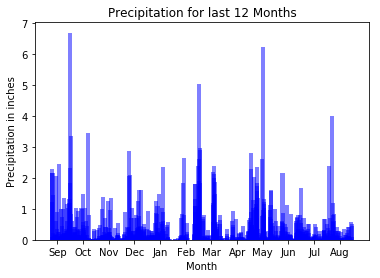

In [16]:
plt.show()

### Station Analysis

#### Total number of stations

In [17]:
from sqlalchemy import func

# Total number of stations
totalnumber_of_stations = session.query(func.count(Station.station)).first()

In [18]:
# Print results of above count query
print(f"Total number of stations: {str(totalnumber_of_stations[0])}")

Total number of stations: 9


#### Most active stations
- Design a query to find the most active stations.
- List the stations and observation counts in descending order
- Store station with the highest number of observations as a variable

In [19]:
# Run query to verify the measurement counts by station
engine.execute("SELECT count(station), station FROM measurement GROUP BY station ORDER BY count(station) DESC").fetchall()

[(2772, 'USC00519281'),
 (2724, 'USC00519397'),
 (2709, 'USC00513117'),
 (2669, 'USC00519523'),
 (2612, 'USC00516128'),
 (2202, 'USC00514830'),
 (1979, 'USC00511918'),
 (1372, 'USC00517948'),
 (511, 'USC00518838')]

In [22]:
# Query to find the most active stations
active_stations_descending = session.query(Measurement.station, func.count(Measurement.station)).\
        group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()

# Set above query results to dataframe
df_active_stations_descending = pd.DataFrame(data=active_stations_descending, columns=['Station', 'Count'])
df_active_stations_descending.head()

,Station,Count
0,USC00519281,2772
1,USC00519397,2724
2,USC00513117,2709
3,USC00519523,2669
4,USC00516128,2612


In [23]:
# Set station with highest number of observations to a variable
station_with_most_observations = df_active_stations_descending["Station"][0]
most_observations = df_active_stations_descending["Count"][0]
print(f"Station with most observations ({most_observations}): {station_with_most_observations}")

Station with most observations (2772): USC00519281


#### Design a query to retrieve the last 12 months of temperature observation data (tobs).
- Filter by the station with the highest number of observations.

In [24]:
# Query for temperature counts (a) for the last year and (b) at the most active station
temperature_frequencies = session.query(Measurement.tobs).\
    filter(Measurement.date >= '2016-08-24').\
    filter(Measurement.station == station_with_most_observations).\
    order_by(Measurement.tobs).all()
    
temperature_frequencies

[(59.0),
 (59.0),
 (59.0),
 (60.0),
 (60.0),
 (61.0),
 (62.0),
 (62.0),
 (62.0),
 (62.0),
 (62.0),
 (62.0),
 (63.0),
 (63.0),
 (63.0),
 (63.0),
 (64.0),
 (64.0),
 (64.0),
 (65.0),
 (65.0),
 (65.0),
 (65.0),
 (65.0),
 (65.0),
 (65.0),
 (66.0),
 (66.0),
 (66.0),
 (66.0),
 (66.0),
 (67.0),
 (67.0),
 (67.0),
 (67.0),
 (67.0),
 (67.0),
 (67.0),
 (67.0),
 (67.0),
 (67.0),
 (67.0),
 (67.0),
 (67.0),
 (67.0),
 (67.0),
 (68.0),
 (68.0),
 (68.0),
 (68.0),
 (68.0),
 (68.0),
 (68.0),
 (68.0),
 (68.0),
 (68.0),
 (68.0),
 (68.0),
 (69.0),
 (69.0),
 (69.0),
 (69.0),
 (69.0),
 (69.0),
 (69.0),
 (69.0),
 (69.0),
 (69.0),
 (69.0),
 (69.0),
 (69.0),
 (69.0),
 (69.0),
 (69.0),
 (69.0),
 (69.0),
 (69.0),
 (70.0),
 (70.0),
 (70.0),
 (70.0),
 (70.0),
 (70.0),
 (70.0),
 (70.0),
 (70.0),
 (70.0),
 (70.0),
 (70.0),
 (70.0),
 (70.0),
 (70.0),
 (70.0),
 (70.0),
 (70.0),
 (70.0),
 (70.0),
 (70.0),
 (70.0),
 (71.0),
 (71.0),
 (71.0),
 (71.0),
 (71.0),
 (71.0),
 (71.0),
 (71.0),
 (71.0),
 (71.0),
 (71.0),
 (71.0),
 

In [25]:
# Define the histogram from the above dataset, with 12 bins
hist, bins = np.histogram(temperature_frequencies, bins=12)

# Set bar width to the number of values between each bin
width = bins[1] - bins[0]

# Plot the bar graph from the histogram data
plt.bar(center, hist, width=width)
plt.show()

NameError: name 'center' is not defined

### Temperature Analysis
- Build function to accept a start date and end date and return the minimum, average, and maximum temperatures for that range of dates.
- Call function to calculate the min, avg, and max temperatures for trip using the matching dates from the previous year (i.e. use "2017-01-01" if trip start date was "2018-01-01")
- Plot the min, avg, and max temperature from your previous query as a bar chart.
    - Use the average temperature as the bar height.
    - Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr).

In [26]:
# Function "calc_temps": accepts start date and end date in the format '%Y-%m-%d' 
#  and returns the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()
    
# Function "last_year_dates": accepts start date and end date in the format '%Y-%m-%d' 
#  and returns the equivalent dates for the previous year
def last_year_dates(start_date, end_date):
    """ Corresponding dates from previous year
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        start_date (string)
        end_date (string)
    """
    lst_start_date = start_date.split('-')
    lst_end_date = end_date.split('-')
    lastyear_start_year = int(lst_start_date[0]) - 1
    lastyear_end_year = int(lst_end_date[0]) - 1
    ly_start_date = f"{lastyear_start_year}-{lst_start_date[1]}-{lst_start_date[2]}"
    ly_end_date = f"{lastyear_end_year}-{lst_end_date[1]}-{lst_end_date[2]}"
    
    return (ly_start_date, ly_end_date)

#### Call function to calculate the min, avg, and max temperatures for trip using the matching dates from the previous year

In [ ]:
#
# *** Define trip dates ***
#
trip_start = '2015-04-20'
trip_end = '2015-04-28'

# Call function to return average temperatures for this date range
average_trip_temps = calc_temps(trip_start, trip_end)

# Call function to grab lates from last year
(lastyear_start_date, lastyear_end_date) = last_year_dates(trip_start, trip_end)

#### Plot average temperature for trip dates

In [ ]:
import seaborn 

# Define standard error (max minus min temps)
yerr_val = average_trip_temps[0][2] - average_trip_temps[0][0]

# Y value is the average temperature for the trip's date range; X is zero since we only need one bar
y = [average_trip_temps[0][1]]
x = 0

In [ ]:
# Define plot
fig, ax = plt.subplots()

# Add  labels, title and axes ticks
ax.set_ylabel("Temperature (F)", fontsize=14)
ax.set_title("Trip Average Temps", fontsize=18)

# Set the limits of the x and y axes, no tick params
ax.bar(x, y, width=.1, color="blue", yerr=yerr_val)
ax.set_xlim(-.1, .1)
ax.set_ylim(0, 100)
ax.set_xbound(lower=-.1, upper=.1)
ax.tick_params(axis='x', which='both', bottom='off', top='off', labelbottom='off') 
plt.show()

#### Calculate the rainfall per weather station using date range from previous year

In [ ]:
# Query to calculate sum of all 'prcp' for each weather station for previous year dates
rainfall_by_station_lastyear = session.query(Measurement.station, func.sum(Measurement.prcp)).\
    filter(Measurement.date >= lastyear_start_date).\
    filter(Measurement.date <= lastyear_end_date).\
    group_by(Measurement.station).\
    order_by(func.sum(Measurement.prcp).desc()).all()
rainfall_by_station_lastyear

In [ ]:
query_to_run = f"SELECT station, sum(prcp) FROM measurement WHERE date >= '{lastyear_start_date}' AND date <= '{lastyear_end_date}' "\
            "GROUP BY station "\
            "ORDER BY sum(prcp) DESC"
print(query_to_run)
engine.execute(query_to_run).fetchall()